In [28]:
import gym
import highway_env
import os 
import matplotlib.pyplot as plt 
from stable_baselines3 import DQN, PPO, A2C
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from matplotlib import pyplot as pyplot
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

env = gym.make('ma-highway-v0')


c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 4)
  "A Box observation space has an unconventional shape (neither an image, nor a 1D vector). "
c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\wrappers\step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [29]:
%matplotlib inline

In [30]:
# Visualization utils
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:52: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  "The argument mode in render method is deprecated; "


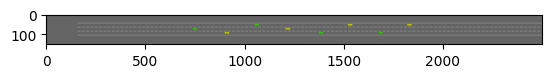

In [56]:
#Paths
log_path = 'highway_a2c/'
A2C_path = os.path.join('Training', 'Saved Models', 'A2C_model')
best_model_path = os.path.join('Training', 'Saved Models', 'Best_Model')

#Configuration
num_steps = 10000
env.configure( {
                "speed_limit": 33,
                "vehicles_density": 1,
                "normalization_range": [-6, 11],
                "ego_spacing": 1.2,
                "road_length":10000, 
                "screen_width": 2000, 
                "simulation_frequency":15, 
                "duration":40,
                "normalize_reward": True,
                "DLC_config": {
                    "count": 4,
                    "reward_speed_range": [25, 31],
                    "weights": [10,5,1,1],
                        },
                "MLC_config": {
                    "count": 4,
                    "reward_speed_range": [17, 24],
                    "weights": [10,5,1,1]
                        }, 
                })
env.reset()

#CallBacks
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=30, verbose=1)
eval_callback = EvalCallback(env, 
                callback_on_new_best=stop_callback, #this is going to to run every new best model
                eval_freq=1000, 
                best_model_save_path=best_model_path, #after 10000 steps is going to check and save in this path
                verbose=1)
                
#model.learn(total_timesteps=20000, callback=eval_callback)
plt.imshow(env.render(mode="rgb_array"))
env.close()
plt.show()

In [11]:
%tensorboard --logdir 'highway_a2c/'

Reusing TensorBoard on port 6006 (pid 42928), started 6 days, 22:59:23 ago. (Use '!kill 42928' to kill it.)

In [57]:
model = A2C('MultiInputPolicy', env, 
             tensorboard_log="highway_a2c/2",
             verbose=True,
             seed=3,
            normalize_advantage=True)

model.learn(total_timesteps=int(num_steps), callback=eval_callback)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_a2c/2\A2C_27


c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:269: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  "Function `env.seed(seed)` is marked as deprecated and will be removed in the future. "


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 6.64     |
|    ep_rew_mean        | 7.55     |
| time/                 |          |
|    fps                | 6        |
|    iterations         | 100      |
|    time_elapsed       | 80       |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -12.6    |
|    explained_variance | 0.0747   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.753    |
|    value_loss         | 2.95     |
------------------------------------


c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\stable_baselines3\common\evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


Eval num_timesteps=1000, episode_reward=7.14 +/- 3.96
Episode length: 6.40 +/- 3.88
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 6.4      |
|    mean_reward        | 7.14     |
| time/                 |          |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -12.8    |
|    explained_variance | 0.348    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -0.245   |
|    value_loss         | 6.25     |
------------------------------------
New best mean reward!
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 6.53     |
|    ep_rew_mean     | 7.3      |
| time/              |          |
|    fps             | 5        |
|    iterations      | 200      |
|    time_elapsed    | 172      |
|    total_timesteps | 1000     |
---------------------------------
------------------------------------

KeyboardInterrupt: 

In [54]:
#MODEL SAVING
model.save(A2C_path)

In [55]:
from tqdm.notebook import trange

###MODEL TESTING###
model = A2C.load('Training/Saved Models/A2C_model', env=env)
for episode in trange(10, desc="Test episodes"):
    env.configure({"simulation_frequency":15, "screen_width": 2500, })
    obs, done = env.reset(), False
    totalreward = 0
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        env.render('human')
        totalreward += reward
    print("Episode " + str(episode) + " reward is: " + str(totalreward))
env.close()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Test episodes:   0%|          | 0/10 [00:00<?, ?it/s]

c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:52: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  "The argument mode in render method is deprecated; "


Episode 0 reward is: 10.763316346318073
Episode 1 reward is: 7.070921442941742
Episode 2 reward is: 3.3404503276484276
Episode 3 reward is: 10.274147561330853
Episode 4 reward is: 3.1954401014405756
Episode 5 reward is: 13.945266230940339
Episode 6 reward is: 10.989953033195459


KeyboardInterrupt: 

In [40]:
model??

Type:        A2C
String form: <stable_baselines3.a2c.a2c.A2C object at 0x0000013777BAF548>
File:        c:\users\iotlab\anaconda3\envs\highwayenv\lib\site-packages\stable_baselines3\a2c\a2c.py
Source:     
class A2C(OnPolicyAlgorithm):
    """
    Advantage Actor Critic (A2C)

    Paper: https://arxiv.org/abs/1602.01783
    Code: This implementation borrows code from https://github.com/ikostrikov/pytorch-a2c-ppo-acktr-gail and
    and Stable Baselines (https://github.com/hill-a/stable-baselines)

    Introduction to A2C: https://hackernoon.com/intuitive-rl-intro-to-advantage-actor-critic-a2c-4ff545978752

    :param policy: The policy model to use (MlpPolicy, CnnPolicy, ...)
    :param env: The environment to learn from (if registered in Gym, can be str)
    :param learning_rate: The learning rate, it can be a function
        of the current progress remaining (from 1 to 0)
    :param n_steps: The number of steps to run for each environment per update
        (i.e. batch size is n_step

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

evaluate_policy(model, env, n_eval_episodes=10, render=True)